# Exploratory Data Analysis (EDA)

In this jupyter notebook an EDA is done on the data obtained from Gbif. The objectives are:
- Explore the data that has been obtained from that web.
- Understand the information that each column contains.
- See the null values, duplicates, outliers, etc.

In [200]:
# Let's import the libraries that will be needed for this EDA.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

In [201]:
# To show all the columns of our dataframe.
pd.options.display.max_columns=None

In [202]:
# Create the first dataframe containing the data from the csv obtained from Gbif.
df_0 = pd.read_csv('../data/gbif_mosquito_data.csv', sep='\t')

# Check the first three rows to see how this dataframe looks like.
df_0.head(3)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,4052772078,1fef1ead-3d02-495e-8ff1-6aeb01123408,e7dbc45e-69c8-4d0d-b19d-109880b51192,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,NaN,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1895)","(Skuse, 1895)",ES,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,41.51019,2.24589,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-04T00:00:00,4,11,2022,1651430,1651430.0,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Roger Eritja,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:00.251Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
1,4052772077,1fef1ead-3d02-495e-8ff1-6aeb01123408,393fc1c6-c24f-479c-b184-5c11c8a2e12d,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,NaN,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1895)","(Skuse, 1895)",IT,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,44.40289,8.98775,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27T00:00:00,27,8,2021,1651430,1651430.0,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Karin Bakran-Lebl;Ana Klobucar;UNIROMA1;Roger ...,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:02.575Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
2,4052772076,1fef1ead-3d02-495e-8ff1-6aeb01123408,bae42ca3-8861-4a61-926d-380359f6a059,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Culex,NaN,NaN,GENUS,"Culex Linnaeus, 1758","Culex (Linnaeus, 1758)","(Linnaeus, 1758)",NL,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,52.14539,5.39437,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25T00:00:00,25,9,2021,1497010,NaN,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Hans-Peter Fuehrer;Mihaela Kavran;Karin Bakran...,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:02.576Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES


## 1. Understand Dataframe

In [203]:
# Check how many rows and columns this dataframe has.
df_0.shape
print(f'This DataFrame has {df_0.shape[0]} rows and {df_0.shape[1]} columns.')

This DataFrame has 24788 rows and 50 columns.


In [204]:
# Check data types, nulls...
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24788 entries, 0 to 24787
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            24788 non-null  int64  
 1   datasetKey                        24788 non-null  object 
 2   occurrenceID                      24788 non-null  object 
 3   kingdom                           24788 non-null  object 
 4   phylum                            24788 non-null  object 
 5   class                             24788 non-null  object 
 6   order                             24788 non-null  object 
 7   family                            24788 non-null  object 
 8   genus                             24788 non-null  object 
 9   species                           15084 non-null  object 
 10  infraspecificEpithet              0 non-null      float64
 11  taxonRank                         24788 non-null  object 
 12  scie

### 1.1 Duplicates

In [205]:
# Check how many duplicated rows are there in the dataframe.
df_0.duplicated().sum()

0

### 1.2 Nulls

In [206]:
# Check how many null values has each column.
df_0.isnull().sum()

gbifID                                  0
datasetKey                              0
occurrenceID                            0
kingdom                                 0
phylum                                  0
class                                   0
order                                   0
family                                  0
genus                                   0
species                              9704
infraspecificEpithet                24788
taxonRank                               0
scientificName                          0
verbatimScientificName                  0
verbatimScientificNameAuthorship        0
countryCode                             6
locality                            24788
stateProvince                       24788
occurrenceStatus                        0
individualCount                     24788
publishingOrgKey                        0
decimalLatitude                         6
decimalLongitude                        6
coordinateUncertaintyInMeters     

In [207]:
# Create a copy of the original dataframe.
df_1=df_0.copy()
df_1.head(3)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,4052772078,1fef1ead-3d02-495e-8ff1-6aeb01123408,e7dbc45e-69c8-4d0d-b19d-109880b51192,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,NaN,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1895)","(Skuse, 1895)",ES,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,41.51019,2.24589,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-04T00:00:00,4,11,2022,1651430,1651430.0,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Roger Eritja,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:00.251Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
1,4052772077,1fef1ead-3d02-495e-8ff1-6aeb01123408,393fc1c6-c24f-479c-b184-5c11c8a2e12d,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,NaN,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1895)","(Skuse, 1895)",IT,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,44.40289,8.98775,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27T00:00:00,27,8,2021,1651430,1651430.0,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Karin Bakran-Lebl;Ana Klobucar;UNIROMA1;Roger ...,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:02.575Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
2,4052772076,1fef1ead-3d02-495e-8ff1-6aeb01123408,bae42ca3-8861-4a61-926d-380359f6a059,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Culex,NaN,NaN,GENUS,"Culex Linnaeus, 1758","Culex (Linnaeus, 1758)","(Linnaeus, 1758)",NL,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,52.14539,5.39437,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25T00:00:00,25,9,2021,1497010,NaN,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Hans-Peter Fuehrer;Mihaela Kavran;Karin Bakran...,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:02.576Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES


In [208]:
# Check which columns have null in every row.
true_1=df_1.isnull().sum()==df_0.shape[0]
true_2=true_1[true_1==True]
true_2

infraspecificEpithet             True
locality                         True
stateProvince                    True
individualCount                  True
coordinateUncertaintyInMeters    True
coordinatePrecision              True
elevation                        True
elevationAccuracy                True
depth                            True
depthAccuracy                    True
catalogNumber                    True
recordNumber                     True
dateIdentified                   True
typeStatus                       True
establishmentMeans               True
dtype: bool

In [209]:
true_2.shape

(15,)

In [210]:
# Delete the columns with only null values.
df_1.drop(true_2.index,axis=1,inplace=True)
df_1.shape

(24788, 35)

In [211]:
# Check again null values looking at its percentage.
df_1_nulos=df_1.isnull().sum()*100/df_1.shape[0]
df_1_nulos.columns=['column','null_percetaje']
df_1_nulos

gbifID                               0.000000
datasetKey                           0.000000
occurrenceID                         0.000000
kingdom                              0.000000
phylum                               0.000000
class                                0.000000
order                                0.000000
family                               0.000000
genus                                0.000000
species                             39.147975
taxonRank                            0.000000
scientificName                       0.000000
verbatimScientificName               0.000000
verbatimScientificNameAuthorship     0.000000
countryCode                          0.024205
occurrenceStatus                     0.000000
publishingOrgKey                     0.000000
decimalLatitude                      0.024205
decimalLongitude                     0.024205
eventDate                            0.000000
day                                  0.000000
month                             

In [212]:
# Check again null values looking at its percentage.
df_1.stb.missing()

,missing,total,percent
species,9704,24788,39.147975
speciesKey,9704,24788,39.147975
issue,8,24788,0.032274
decimalLongitude,6,24788,0.024205
countryCode,6,24788,0.024205
decimalLatitude,6,24788,0.024205
order,0,24788,0.000000
month,0,24788,0.000000
mediaType,0,24788,0.000000
lastInterpreted,0,24788,0.000000


In [213]:
# This could also be done like this.
df_1_nulos=pd.DataFrame(df_1.isnull().sum()*100/df_1.shape[0]).reset_index()
df_1_nulos.columns=['column','null_percetaje']
df_1_nulos

,column,null_percetaje
0,gbifID,0.000000
1,datasetKey,0.000000
2,occurrenceID,0.000000
3,kingdom,0.000000
4,phylum,0.000000
5,class,0.000000
6,order,0.000000
7,family,0.000000
8,genus,0.000000
9,species,39.147975


### 1.3 Unique values

In [214]:
# Check the unique values and its quantity.
df_1['species'].value_counts()

Aedes albopictus    14518
Aedes japonicus       360
Aedes koreicus        164
Aedes aegypti          42
Name: species, dtype: int64

In [215]:
df_1['speciesKey'].value_counts()

1651430.0    14518
1652212.0      360
1652150.0      164
1651891.0       42
Name: speciesKey, dtype: int64

In [216]:
# As this two rows have redundant information, one of them will be deleted.
columns_to_delete=['speciesKey']

In [217]:
# Check which other columns won't be used.
df_1['datasetKey'].unique()

array(['1fef1ead-3d02-495e-8ff1-6aeb01123408'], dtype=object)

In [218]:
df_1['occurrenceID'].unique().shape

(24788,)

In [219]:
df_1['kingdom'].unique()

array(['Animalia'], dtype=object)

In [220]:
df_1['phylum'].unique()

array(['Arthropoda'], dtype=object)

In [221]:
df_1['class'].unique()

array(['Insecta'], dtype=object)

In [222]:
df_1['order'].unique()

array(['Diptera'], dtype=object)

In [223]:
df_1['family'].unique()

array(['Culicidae'], dtype=object)

In [224]:
df_1['scientificName'].unique()

array(['Aedes albopictus (Skuse, 1894)', 'Culex Linnaeus, 1758',
       'Aedes japonicus', 'Aedes koreicus (Edwards, 1917)',
       'Aedes aegypti (Linnaeus, 1762)'], dtype=object)

In [225]:
df_1['verbatimScientificName'].unique()

array(['Aedes albopictus (Skuse, 1895)', 'Culex (Linnaeus, 1758)',
       'Aedes japonicus (Theobald, 1901)',
       'Aedes koreicus (Edwards, 1917)', 'Aedes aegypti (Linnaeus, 1762)'],
      dtype=object)

In [226]:
df_1['verbatimScientificNameAuthorship'].unique()

array(['(Skuse, 1895)', '(Linnaeus, 1758)', '(Theobald, 1901)',
       '(Edwards, 1917)', '(Linnaeus, 1762)'], dtype=object)

In [227]:
df_1['occurrenceStatus'].unique()

array(['PRESENT'], dtype=object)

In [228]:
df_1['publishingOrgKey'].unique()

array(['7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c'], dtype=object)

In [229]:
df_1['taxonKey'].unique()

array([1651430, 1497010, 1652212, 1652150, 1651891])

In [230]:
df_1['basisOfRecord'].unique()

array(['HUMAN_OBSERVATION'], dtype=object)

In [231]:
df_1['institutionCode'].unique()

array(['CREAF'], dtype=object)

In [232]:
df_1['collectionCode'].unique()

array(['Mosquito Alert Tiger Mosquito'], dtype=object)

In [233]:
df_1['license'].unique()

array(['CC0_1_0'], dtype=object)

In [234]:
df_1['rightsHolder'].unique()

array(['Mosquito Alert'], dtype=object)

In [235]:
df_1['recordedBy'].unique()

array(['Anonymous Mosquito Alert citizen scientist'], dtype=object)

In [236]:
df_1['mediaType'].unique()

array(['StillImage'], dtype=object)

In [237]:
df_1['issue'].unique()

array(['CONTINENT_DERIVED_FROM_COORDINATES', nan,
       'COUNTRY_COORDINATE_MISMATCH;CONTINENT_DERIVED_FROM_COORDINATES'],
      dtype=object)

In [238]:
# Checking each column one by one to see the information contained, the result is that these columns
#  can be deleted because they the same value for every row.
columns_to_delete=['speciesKey','datasetKey','kingdom','phylum','class','order','family','scientificName',
                    'verbatimScientificName','verbatimScientificNameAuthorship','occurrenceStatus',
                    'publishingOrgKey','basisOfRecord','institutionCode','collectionCode','license',
                    'rightsHolder','recordedBy','mediaType']

In [239]:
df_1.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'taxonRank', 'scientificName',
       'verbatimScientificName', 'verbatimScientificNameAuthorship',
       'countryCode', 'occurrenceStatus', 'publishingOrgKey',
       'decimalLatitude', 'decimalLongitude', 'eventDate', 'day', 'month',
       'year', 'taxonKey', 'speciesKey', 'basisOfRecord', 'institutionCode',
       'collectionCode', 'identifiedBy', 'license', 'rightsHolder',
       'recordedBy', 'lastInterpreted', 'mediaType', 'issue'],
      dtype='object')

In [240]:
df_2=df_1.drop(columns_to_delete,axis=1,inplace=False)
df_2.head(3)

,gbifID,occurrenceID,genus,species,taxonRank,countryCode,decimalLatitude,decimalLongitude,eventDate,day,month,year,taxonKey,identifiedBy,lastInterpreted,issue
0,4052772078,e7dbc45e-69c8-4d0d-b19d-109880b51192,Aedes,Aedes albopictus,SPECIES,ES,41.51019,2.24589,2022-11-04T00:00:00,4,11,2022,1651430,Roger Eritja,2023-03-23T07:53:00.251Z,CONTINENT_DERIVED_FROM_COORDINATES
1,4052772077,393fc1c6-c24f-479c-b184-5c11c8a2e12d,Aedes,Aedes albopictus,SPECIES,IT,44.40289,8.98775,2021-08-27T00:00:00,27,8,2021,1651430,Karin Bakran-Lebl;Ana Klobucar;UNIROMA1;Roger ...,2023-03-23T07:53:02.575Z,CONTINENT_DERIVED_FROM_COORDINATES
2,4052772076,bae42ca3-8861-4a61-926d-380359f6a059,Culex,NaN,GENUS,NL,52.14539,5.39437,2021-09-25T00:00:00,25,9,2021,1497010,Hans-Peter Fuehrer;Mihaela Kavran;Karin Bakran...,2023-03-23T07:53:02.576Z,CONTINENT_DERIVED_FROM_COORDINATES


In [241]:
df_2.columns

Index(['gbifID', 'occurrenceID', 'genus', 'species', 'taxonRank',
       'countryCode', 'decimalLatitude', 'decimalLongitude', 'eventDate',
       'day', 'month', 'year', 'taxonKey', 'identifiedBy', 'lastInterpreted',
       'issue'],
      dtype='object')

In [242]:
# Check the number of unique values each column has.
for column in df_2.columns:
    print(f'Column --{column}-- has {len(df_2[column].unique())} unique values')

Column --gbifID-- has 24788 unique values
Column --occurrenceID-- has 24788 unique values
Column --genus-- has 2 unique values
Column --species-- has 5 unique values
Column --taxonRank-- has 2 unique values
Column --countryCode-- has 70 unique values
Column --decimalLatitude-- has 19948 unique values
Column --decimalLongitude-- has 20732 unique values
Column --eventDate-- has 2019 unique values
Column --day-- has 31 unique values
Column --month-- has 12 unique values
Column --year-- has 9 unique values
Column --taxonKey-- has 5 unique values
Column --identifiedBy-- has 2998 unique values
Column --lastInterpreted-- has 5703 unique values
Column --issue-- has 3 unique values


In [243]:
# Check how many rows this dataframe has.
print(f'This DataFrame has {df_0.shape[0]} rows.')

This DataFrame has 24788 rows.


In [244]:
# As column 'gbifID' and 'occurrenceID' have the same numer of unique values as rows
#  this dataframe has, One of this columns will be deleted and the other will be
#  mantained as index for each row.
df_2=df_2.drop('occurrenceID',axis=1,inplace=False)
df_2.head(3)

,gbifID,genus,species,taxonRank,countryCode,decimalLatitude,decimalLongitude,eventDate,day,month,year,taxonKey,identifiedBy,lastInterpreted,issue
0,4052772078,Aedes,Aedes albopictus,SPECIES,ES,41.51019,2.24589,2022-11-04T00:00:00,4,11,2022,1651430,Roger Eritja,2023-03-23T07:53:00.251Z,CONTINENT_DERIVED_FROM_COORDINATES
1,4052772077,Aedes,Aedes albopictus,SPECIES,IT,44.40289,8.98775,2021-08-27T00:00:00,27,8,2021,1651430,Karin Bakran-Lebl;Ana Klobucar;UNIROMA1;Roger ...,2023-03-23T07:53:02.575Z,CONTINENT_DERIVED_FROM_COORDINATES
2,4052772076,Culex,NaN,GENUS,NL,52.14539,5.39437,2021-09-25T00:00:00,25,9,2021,1497010,Hans-Peter Fuehrer;Mihaela Kavran;Karin Bakran...,2023-03-23T07:53:02.576Z,CONTINENT_DERIVED_FROM_COORDINATES


### 1.4 Outliers

In [245]:
# Check for outliers.
numeric=df_2.select_dtypes(include=np.number)
numeric.head(3)

,gbifID,decimalLatitude,decimalLongitude,day,month,year,taxonKey
0,4052772078,41.51019,2.24589,4,11,2022,1651430
1,4052772077,44.40289,8.98775,27,8,2021,1651430
2,4052772076,52.14539,5.39437,25,9,2021,1497010


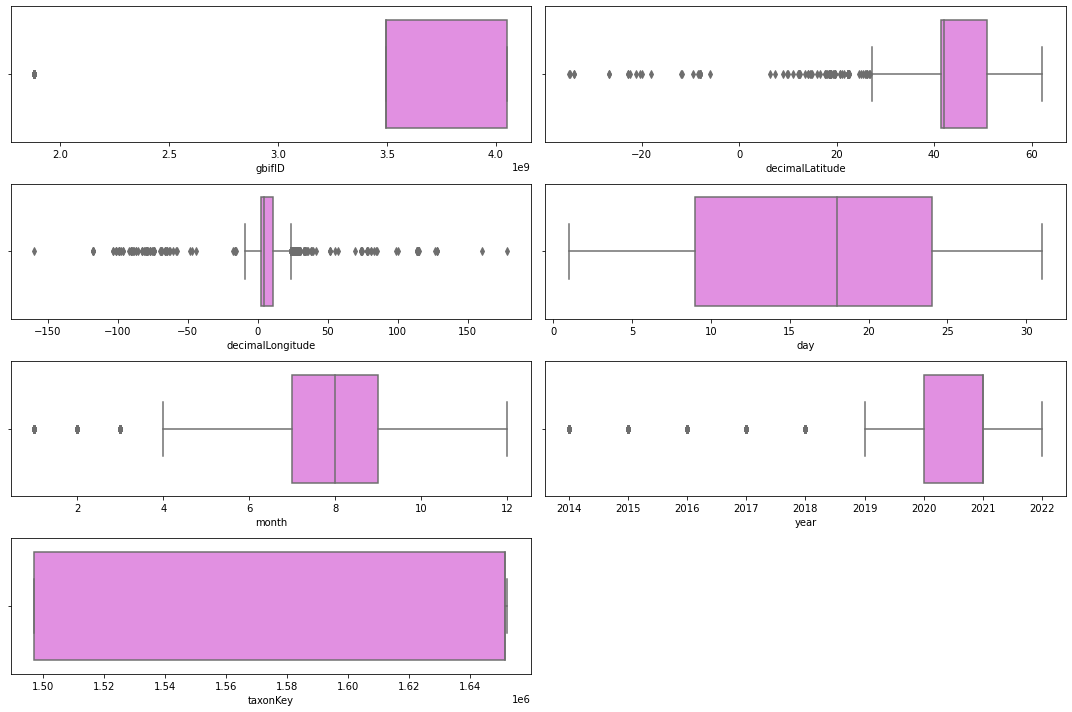

In [246]:
# Set figure characteristics.
fig, axes =plt.subplots(4,2,figsize=(15,10))

# Flatter axes to plot them easier/faster using a for loop.
axes = axes.flat

for graph in range(len(numeric.columns)):
    sns.boxplot(x=numeric.columns[graph],data=df_2,ax=axes[graph],color='violet')

# Delete empty graph.
fig.delaxes(axes[7])

# Adjust graphs so they don't overlap.
fig.tight_layout()

# Show figures.
plt.show()

Looking at this outliers representation it can be said that none of this numeric variables are importante if they have outliers. It is interesting to see where most of the mosquito alerts are. For example, it is noticeable that most of the cases happen around august and most of them have been registered form 2020 to 2021.

## 2. Graphic exploratory analysis

### 2.1 Numeric variables relationship

#### 2.1.1 Scatterplot

In [247]:
# Select only categorical variables from our dataframe.
categorical=df_2.select_dtypes(include='object')
categorical.head(3)

,genus,species,taxonRank,countryCode,eventDate,identifiedBy,lastInterpreted,issue
0,Aedes,Aedes albopictus,SPECIES,ES,2022-11-04T00:00:00,Roger Eritja,2023-03-23T07:53:00.251Z,CONTINENT_DERIVED_FROM_COORDINATES
1,Aedes,Aedes albopictus,SPECIES,IT,2021-08-27T00:00:00,Karin Bakran-Lebl;Ana Klobucar;UNIROMA1;Roger ...,2023-03-23T07:53:02.575Z,CONTINENT_DERIVED_FROM_COORDINATES
2,Culex,NaN,GENUS,NL,2021-09-25T00:00:00,Hans-Peter Fuehrer;Mihaela Kavran;Karin Bakran...,2023-03-23T07:53:02.576Z,CONTINENT_DERIVED_FROM_COORDINATES


In [248]:
# Delete those columns that are not interesting to show.
categorical_2=categorical.drop(['taxonRank','countryCode','eventDate','identifiedBy','lastInterpreted'],axis=1,inplace=False)
categorical_2.head(3)

,genus,species,issue
0,Aedes,Aedes albopictus,CONTINENT_DERIVED_FROM_COORDINATES
1,Aedes,Aedes albopictus,CONTINENT_DERIVED_FROM_COORDINATES
2,Culex,NaN,CONTINENT_DERIVED_FROM_COORDINATES


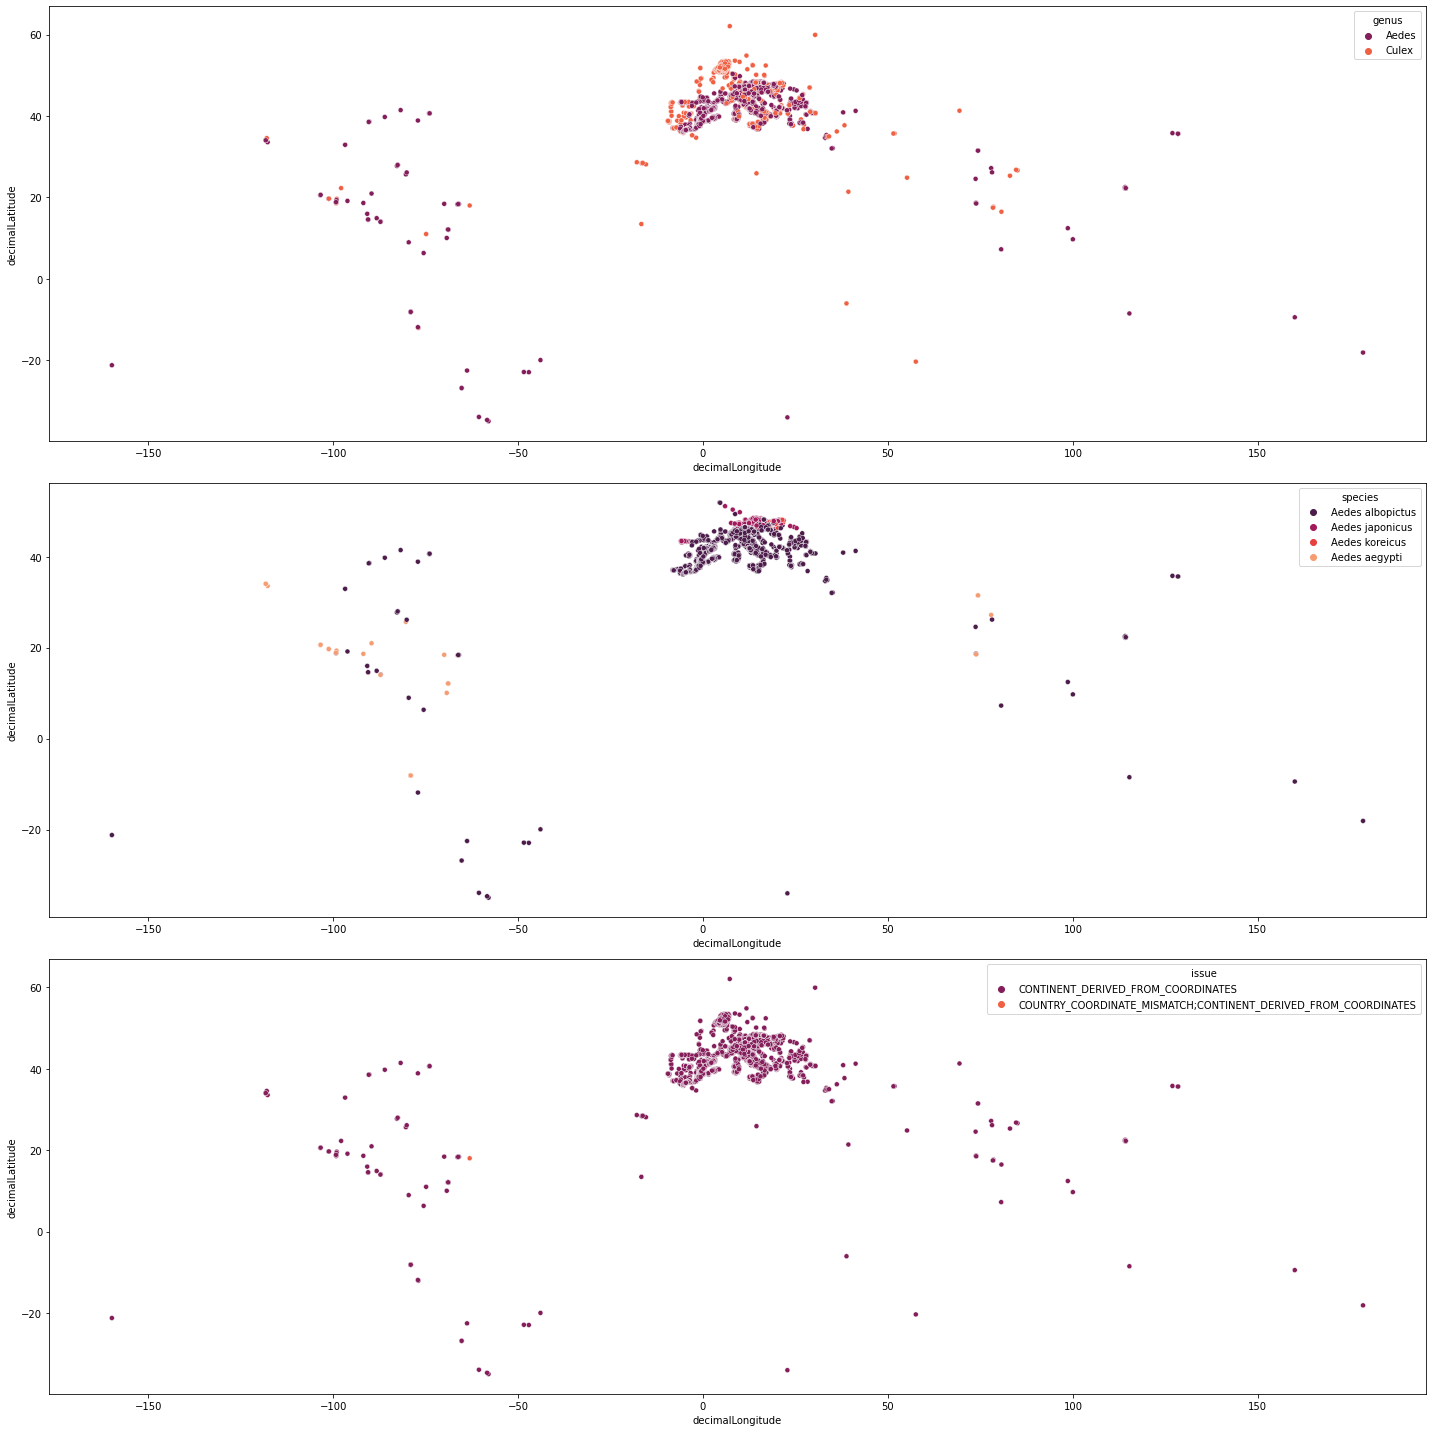

In [249]:
# Create a Scatterplot for every categorical variable so it can been seen the relationship
#  between the two numeric variables selected, in this case latitude and longitude were selected,
#  so the graphs will have a world map shape more or less.

# Set figure characteristics.
fig, axes = plt.subplots(3, 1, figsize=(20,20))

for i in range(len(categorical_2.columns)): 
    sns.scatterplot(x='decimalLongitude', y='decimalLatitude', data = df_2,
                    s = 25, # markers shape   
                    hue = categorical_2.columns[i], # different colors for each value of the categorical variable
                    ax=axes[i],palette='rocket')

# Adjust graphs so they don't overlap.
fig.tight_layout()

# Show figures.
plt.show()

It an be seen that these graphs have a world map shape, because the numeric variables are coordinates. So we can not see a positive or negative relationship between these numeric variables but we can see the distribution of the categorical variables around the World.

#### 2.1.2 Regplot

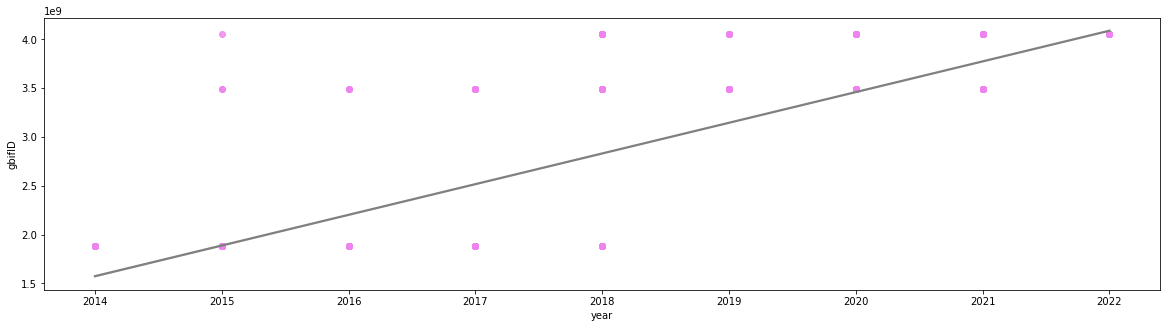

In [250]:
# Set figure characteristics.
plt.figure(figsize=(20,5))

# Create a regplot to check the relationship between year and gbifID.
sns.regplot(x='year', y='gbifID', data = df_2, scatter_kws={"color": "violet"},line_kws={"color": "grey"})

# Show figure.
plt.show()

It can be seen that there is a positive relationship between these variables, but it is not something relevant because 'gbifID' is an ID given to each mosquito registration.

#### 2.1.3 Heatmap

In [251]:
# Check the correlation between the numeric variables.
df_2.corr()

/tmp/ipykernel_7586/2121852897.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2.corr()


,gbifID,decimalLatitude,decimalLongitude,day,month,year,taxonKey
gbifID,1.000000,0.353841,0.272656,-0.006629,-0.015871,0.913958,-0.346585
decimalLatitude,0.353841,1.000000,0.273948,0.100339,-0.055222,0.413725,-0.629413
decimalLongitude,0.272656,0.273948,1.000000,-0.007930,-0.017805,0.313339,-0.089317
day,-0.006629,0.100339,-0.007930,1.000000,-0.205096,0.015852,-0.094346
month,-0.015871,-0.055222,-0.017805,-0.205096,1.000000,-0.123925,0.011856
year,0.913958,0.413725,0.313339,0.015852,-0.123925,1.000000,-0.398911
taxonKey,-0.346585,-0.629413,-0.089317,-0.094346,0.011856,-0.398911,1.000000


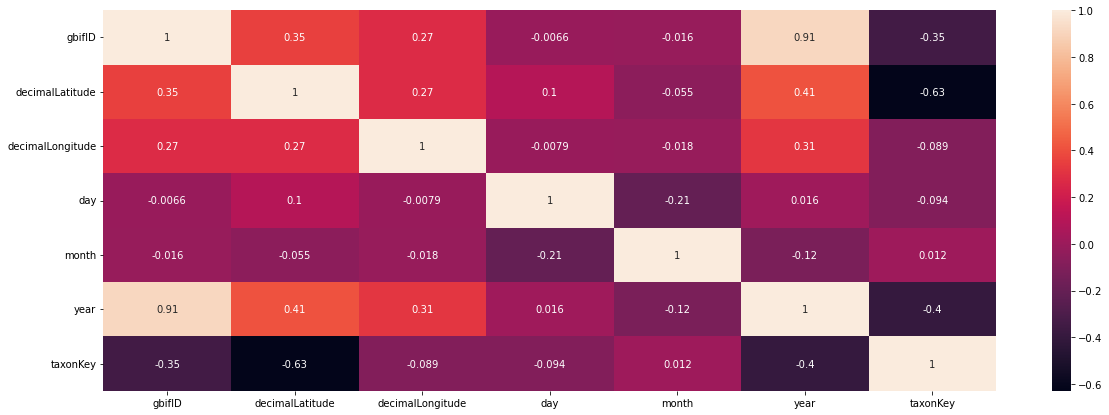

In [252]:
# Check the correlation between the numeric variables graphically.

# Set figure characteristics.
plt.figure(figsize=(20,7))

# Create heatmap.
sns.heatmap(data=numeric.corr(),
            cmap = "rocket", # para cambiar el color
            annot = True); # para sacar el valor de la correlación

# Show figure.
plt.show()

It can be seen that there are not correlation between any numeric variable. There is a positive relationship between 'year' and 'gbifID', but it is not something relevant because 'gbifID' is an ID given to each mosquito registration.

#### 2.1.4 Jointplot

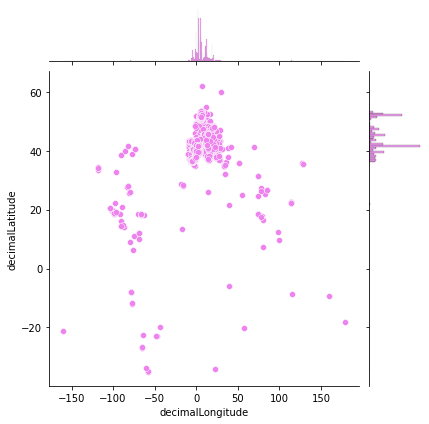

In [253]:
# Check the relationship between 'decimalLongitude' and 'decimalLatitude' graphically and their distribution.

# Create jointplot.
sns.jointplot(x='decimalLongitude',  y='decimalLatitude', data = df_2, color = "violet", kind = "scatter")

# Show figure.
plt.show()

### 2.2 Categorical variables relationship

#### 2.2.1 Countplot

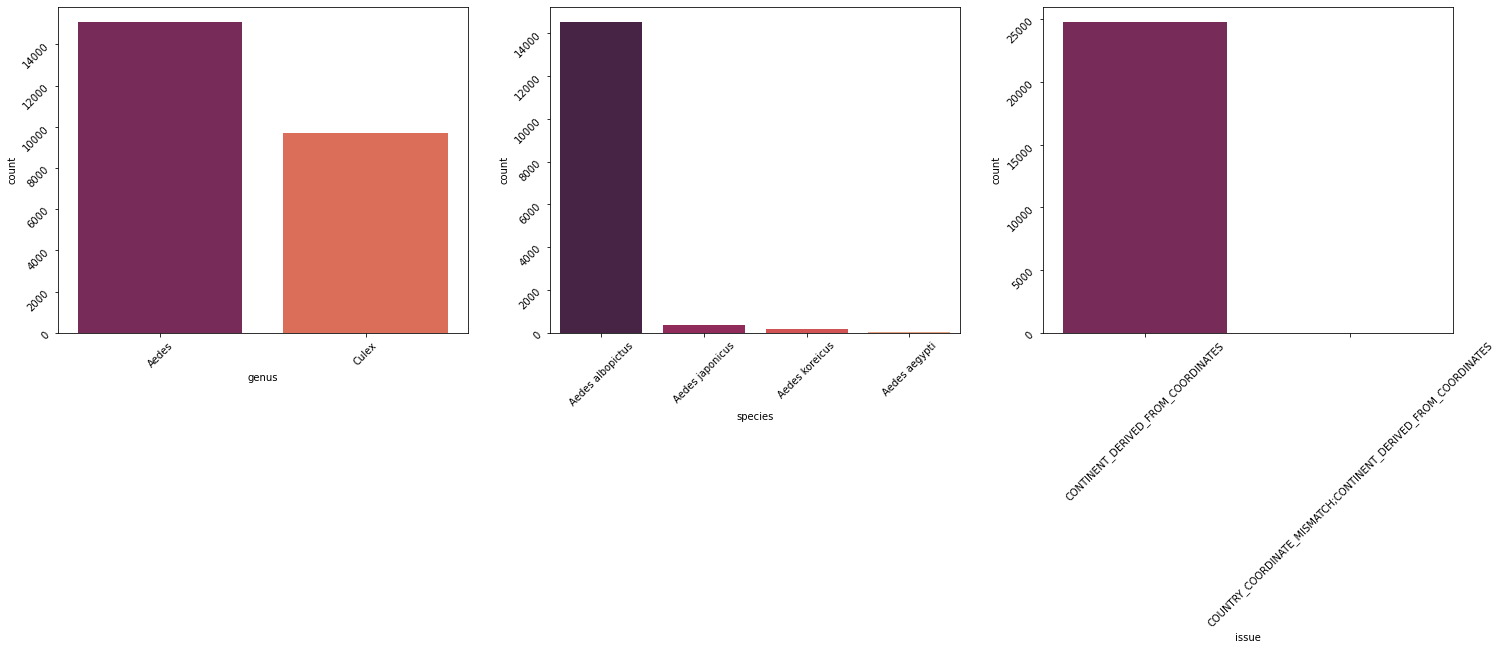

In [254]:
# Set figure characteristics.
fig, axes = plt.subplots(1, 3, figsize=(25,6))

# Rotate labels.
for ax in fig.axes:
    ax.tick_params(labelrotation=45)

# Create a for loop to creat one countplot for each categorical variable.
for i in range(len(categorical_2.columns)):
    sns.countplot(x = categorical_2.columns[i], data = df_2, ax=axes[i],palette='rocket'); 

# Show figure.
plt.show()

Looking at the first graph, it can be seen that there are more 'Aedes sp.' than 'Culex sp.' mosquitoes. Looking at the second graph, it can be seen that most of the mosquitoes registered are 'Aedes albopictus' (tiger mosquito). And looking at the third graph, it can be seen that most of countries where the mosquito has been seen have been obtained from its cordinates.

### 2.3 Numeric and categorical variables relationship

#### 2.3.1 Violinplot

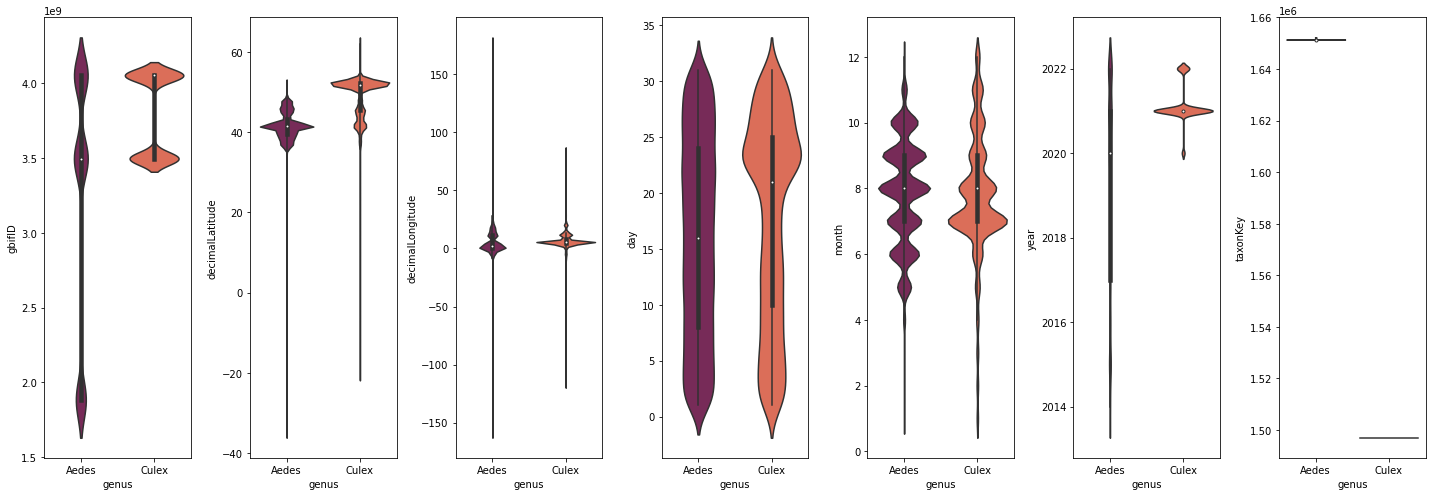

In [255]:
# Set figure characteristics.
fig, axes = plt.subplots(1, 7, figsize=(20,7))

# Create a for loop to creat one violinplot for each numerical variable.
for i in range(len(numeric.columns)): 
    sns.violinplot(x='genus', y=numeric.columns[i], data = df_2 , ax = axes[i], palette = "rocket")   

# Adjust graphs so they don't overlap.
fig.tight_layout()

# Show figure.
plt.show()

Using this violinplots it can be seen the distribution of the data. Moreover, the white dot represents its median, the black wide bar shows the interquartile range and the black narrow bars show the 95% confidence intervals.

As it was said before, 'gbifID' is not a relevant variable to check for relationships. It happens the same with 'taxonKey' because 'genus' and 'taxonKey' are the same.

It can be seen that Aedes y located mainly around 40 decimal latitude and 0 longitude, while Culex is located around 50 latitude and 0 longitude.

Furthermore, Aedes and Culex have been notified any day of the month, but there have been more registrations from may to october.

#### 2.3.2 Pointplot

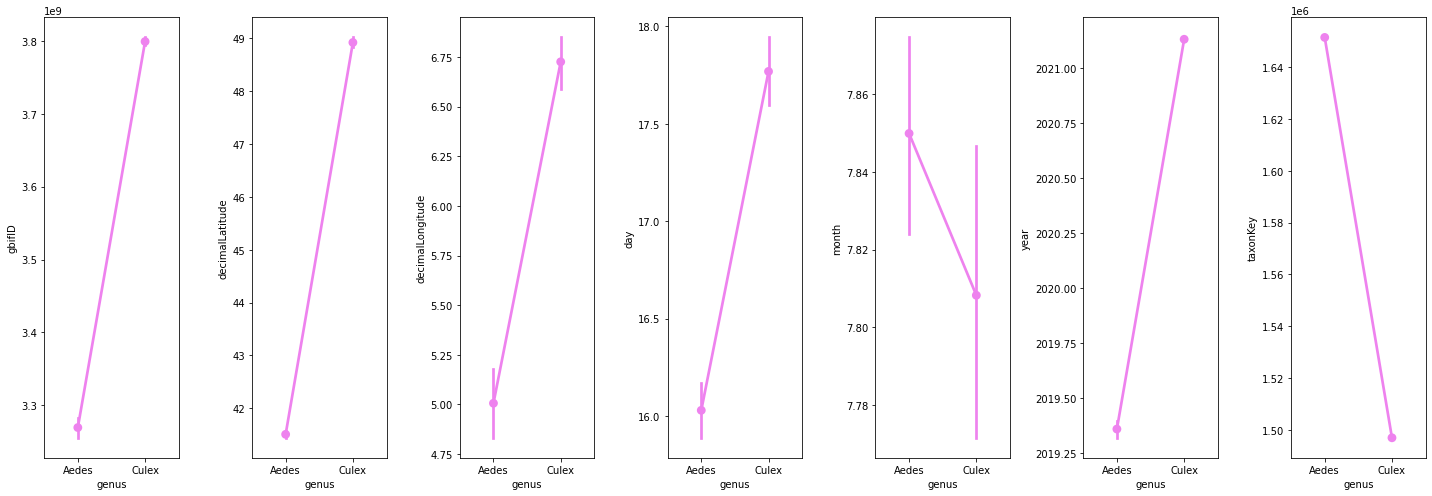

In [256]:
# Set figure characteristics.
fig, axes = plt.subplots(1, 7, figsize=(20,7))

# Create a for loop to creat one violinplot for each numerical variable.
for i in range(len(numeric.columns)): 
    sns.pointplot(x='genus', y=numeric.columns[i], data = df_2 , ax = axes[i], color = "violet")   

# Adjust graphs so they don't overlap.
fig.tight_layout()

# Show figure.
plt.show()

As this dataset does not have a numeric value that cuantifies something for each row, this kind of graph is not of interest. Because it shows the mean value and its standard deviation from the mean.

## 3. Save dataframe

In [258]:
# Save this dataframe as a new file.
df_2.to_csv('../data/mosquito1_explored.csv')